# **PROYECTO DE CURSO – FASE 1**
 
### **Catedrático:** Ing. Pren Biba - Statistical Learning I 
### **Auxiliar:** Inga. Alejandra Ubico Fecha: Mayo 2024

##### **Jose Guillermo Gordillo Lopez -  23003971**
##### **Marvin Fernando Carrillo Robles - 14003303**	 

In [1]:
#Librerias necesarias para trabajar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Identificación del Dataset a utilizar**	 

Este conjunto de datos contiene muestras de calidad del agua recopiladas de Puget Sound, lagos y arroyos de la región. Este Dataser permitirá evaluar la información de las diferentes Variables identificadas:

- **Sample ID:** Identificador único para cada muestra tomada.
- **Grab ID:** Identificador de la instancia de captura específica asociada con la muestra.
- **Profile ID:** Identificador del perfil asociado a la muestra.
- **Sample Number:** Número secuencial asignado a cada muestra.
- **Collect DateTime:** Fecha y hora en que se recolectó la muestra.
- **Depth (m):** Profundidad a la que se recolectó la muestra, medida en metros.
- **Site Type:** Tipo de sitio donde se recolectó la muestra (p. ej., río, lago, pozo).
- **Area:** Área geográfica o región donde se recolectó la muestra.
- **Locator:** Información del localizador que indica la ubicación precisa de la muestra.
- **Site:** Sitio o ubicación específica donde se recolectó la muestra.
- **Parameter:** El parámetro medido o analizado en la muestra (p. ej., pH, oxígeno disuelto).
- **Value:** Valor del parámetro medido en la muestra.
- **Units:** Unidades de medida para el valor del parámetro.
- **QualityId:** Identificador que indica la calidad de los datos.
- **Lab Qualifier:** Calificador asignado por el laboratorio que indica alguna condición o característica especial de la muestra.
- **MDL (Method Detection Limit):** Límite de detección del método para el parámetro.
- **RDL (Reporting Detection Limit):** Límite de detección de informes para el parámetro.
- **Text Value:** Representación textual del valor del parámetro.
- **Sample Info:** Información adicional relacionada con la muestra.
- **Steward Note:** Notas o comentarios proporcionados por el administrador de datos.
- **Replicates:** Número de réplicas tomadas para la muestra.
- **Replicate Of:** Identificador que indica la muestra de la que se trata de una réplica.
- **Method:** Método utilizado para el análisis o medición.
- **Date Analyzed:** Fecha en que se analizó la muestra.
- **Data Source:** Fuente de los datos.

### 1.2 Carga del Dataset

In [2]:
dataPro = pd.read_csv("SRC/DATA/water-quality-1.csv")
dataPro.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL


# 2. Análisis Exploratorio:

 ### 2.1 Parte descriptora del Dataset

In [3]:
dataPro.describe()

,Sample ID,Grab ID,Profile ID,Depth (m),Value,QualityId,MDL,RDL,Replicates,Replicate Of
count,1.259444e+06,882666.000000,1.259444e+06,882666.000000,1.150359e+06,1.259444e+06,607733.000000,606146.000000,1641.000000,1531.000000
mean,8.072059e+04,88473.753640,4.265437e+04,10.602864,1.534332e+02,1.948271e+00,0.323792,1.900974,105815.064595,112754.053560
std,5.168191e+04,46349.581657,1.659986e+04,14.142444,6.204438e+03,5.608278e-01,0.495199,3.280455,55902.772689,50282.683689
min,5.310000e+02,700.000000,4.000000e+00,0.000000,-1.600000e+00,0.000000e+00,0.000000,0.000000,2824.000000,2153.000000
25%,3.191200e+04,54359.250000,3.647275e+04,1.000000,9.100000e-01,2.000000e+00,0.010000,0.040000,63136.000000,63376.000000
50%,7.482800e+04,86714.000000,4.273100e+04,6.000000,7.630000e+00,2.000000e+00,0.500000,1.000000,123467.000000,127822.000000
75%,1.257890e+05,125306.000000,5.025800e+04,15.000000,2.400000e+01,2.000000e+00,0.500000,1.000000,156988.000000,157521.000000
max,1.860330e+05,186033.000000,7.911900e+04,201.000000,1.000000e+06,9.000000e+00,100.000000,60.000000,185802.000000,185803.000000


### 2.2 Identificación de Tipos de Datos del Dataset

In [4]:
dataPro.dtypes

Sample ID             int64
Grab ID             float64
Profile ID            int64
Sample Number        object
Collect DateTime     object
Depth (m)           float64
Site Type            object
Area                 object
Locator              object
Site                 object
Parameter            object
Value               float64
Units                object
QualityId             int64
Lab Qualifier        object
MDL                 float64
RDL                 float64
Text Value           object
Sample Info          object
Steward Note         object
Replicates          float64
Replicate Of        float64
Method               object
Date Analyzed        object
Data Source          object
dtype: object

### 2.3 Identificación de Registros ÚNICOS por Variable

    Para determinar por variable la cantidad de registros únicos almacenados en la misma

In [5]:
for col in dataPro:    
    print(col+": "+str(len(dataPro[col].unique())))

Sample ID: 154694
Grab ID: 112986
Profile ID: 54951
Sample Number: 154694
Collect DateTime: 102284
Depth (m): 647
Site Type: 6
Area: 68
Locator: 180
Site: 178
Parameter: 47
Value: 6013
Units: 24
QualityId: 8
Lab Qualifier: 52
MDL: 166
RDL: 472
Text Value: 24857
Sample Info: 354
Steward Note: 65
Replicates: 203
Replicate Of: 203
Method: 203
Date Analyzed: 4611
Data Source: 1


#### 2.3.1 Visualización de los resultados de ÚNICOS de las variables

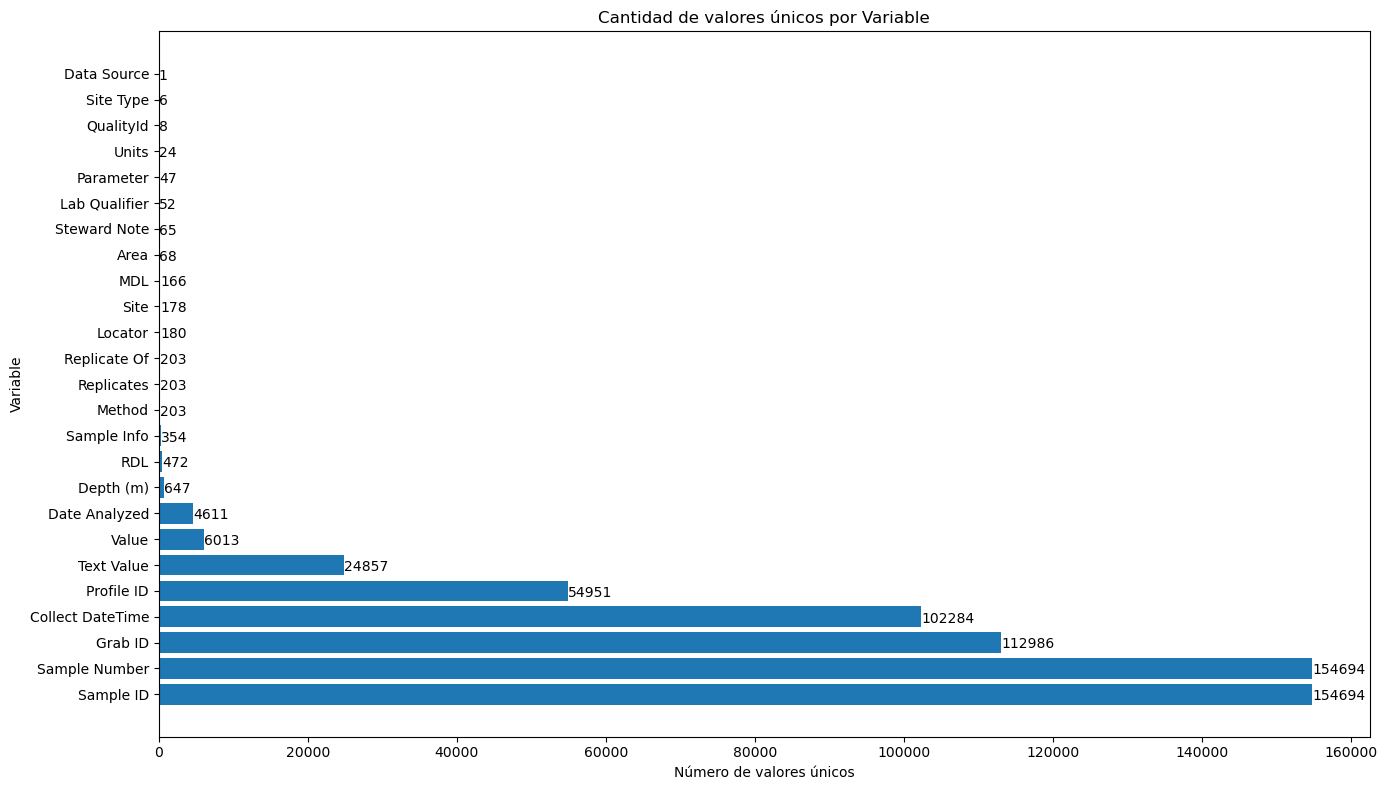

In [6]:

results = []

for col in dataPro:
     
    unique_values = len(dataPro[col].unique())
    
     
    results.append({'Column': col, 'Unique Values': unique_values})

 
results_df = pd.DataFrame(results)

 
results_df = results_df.sort_values(by='Unique Values', ascending=False)

 
plt.figure(figsize=(14, 8))
plt.barh(range(len(results_df)), results_df['Unique Values'], align='center')
plt.yticks(range(len(results_df)), results_df['Column'])
plt.title('Cantidad de valores únicos por Variable')
plt.xlabel('Número de valores únicos')
plt.ylabel('Variable')

 
for i, (col, unique_values) in enumerate(zip(results_df['Column'], results_df['Unique Values'])):
    plt.text(unique_values, i + 0.2, str(unique_values), ha='left', va='top')

plt.tight_layout()
plt.show()

    Inconsistencias

Se identificó que la variable **Data Source** solo tiene un valor, por lo que no aporta nada al modelo y se decide eliminarla

##### 2.3.1.1 Depuración de la Variable

In [7]:
dataPro.drop("Data Source", axis=1, inplace=True)

    Dataset sin Variable "Data Source"

In [8]:
dataPro.dtypes

Sample ID             int64
Grab ID             float64
Profile ID            int64
Sample Number        object
Collect DateTime     object
Depth (m)           float64
Site Type            object
Area                 object
Locator              object
Site                 object
Parameter            object
Value               float64
Units                object
QualityId             int64
Lab Qualifier        object
MDL                 float64
RDL                 float64
Text Value           object
Sample Info          object
Steward Note         object
Replicates          float64
Replicate Of        float64
Method               object
Date Analyzed        object
dtype: object

In [9]:
for col in dataPro:    
    print(col+": "+str(len(dataPro[col].unique())))

Sample ID: 154694
Grab ID: 112986
Profile ID: 54951
Sample Number: 154694
Collect DateTime: 102284
Depth (m): 647
Site Type: 6
Area: 68
Locator: 180
Site: 178
Parameter: 47
Value: 6013
Units: 24
QualityId: 8
Lab Qualifier: 52
MDL: 166
RDL: 472
Text Value: 24857
Sample Info: 354
Steward Note: 65
Replicates: 203
Replicate Of: 203
Method: 203
Date Analyzed: 4611


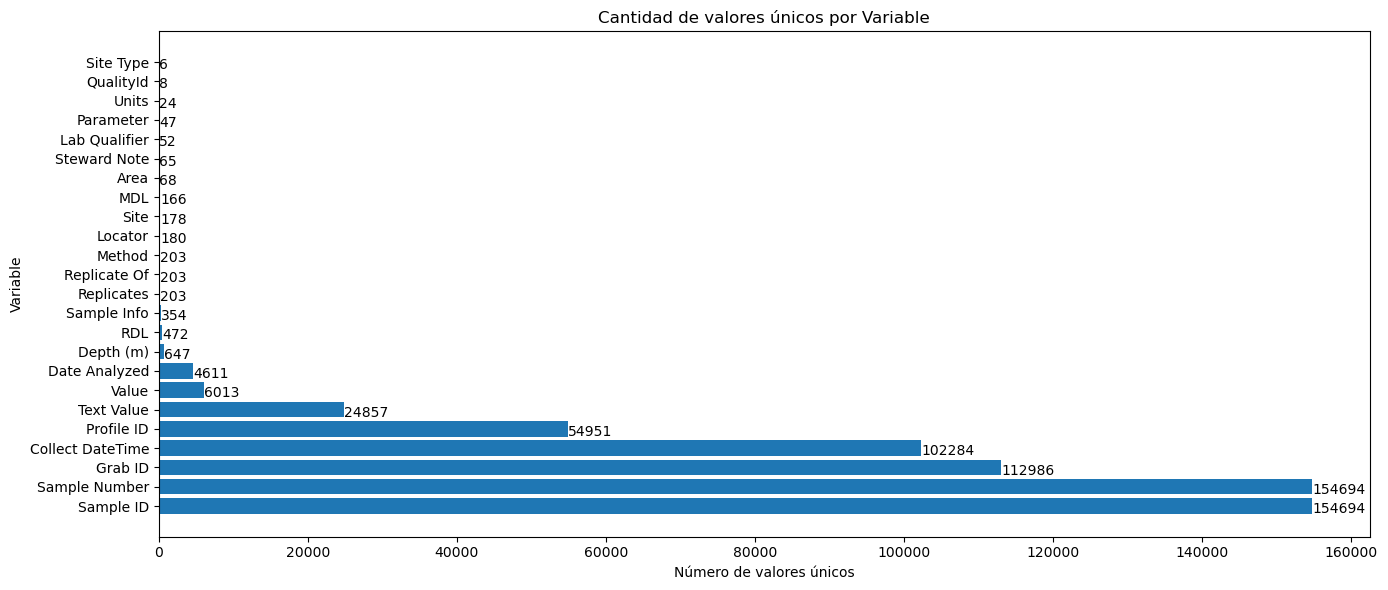

In [10]:

results = []

for col in dataPro:
     
    unique_values = len(dataPro[col].unique())
    
     
    results.append({'Column': col, 'Unique Values': unique_values})

 
results_df = pd.DataFrame(results)

 
results_df = results_df.sort_values(by='Unique Values', ascending=False)

 
plt.figure(figsize=(14, 6))
plt.barh(range(len(results_df)), results_df['Unique Values'], align='center')
plt.yticks(range(len(results_df)), results_df['Column'])
plt.title('Cantidad de valores únicos por Variable')
plt.xlabel('Número de valores únicos')
plt.ylabel('Variable')

 
for i, (col, unique_values) in enumerate(zip(results_df['Column'], results_df['Unique Values'])):
    plt.text(unique_values, i + 0.2, str(unique_values), ha='left', va='top')

plt.tight_layout()
plt.show()

    Exportamos el dataset reducido

In [11]:
dataPro.to_csv('SRC/DATA/water-quality-2.csv', index=False)